In [1]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model, losses
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Layer
from tensorflow.keras.datasets import cifar10
import numpy as np

In [2]:
(x_train, _), (x_test, _) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [5]:
class Encoder(Layer):
    def __init__(self, encoding_dim=1024, **kwargs):
        super(Encoder, self).__init__(**kwargs)
        self.encoding_dim = encoding_dim
    
    def build(self, input_shape):
        self.flatten = Flatten()
        self.dense = Dense(self.encoding_dim, activation="relu")
    
    def call(self, inputs):
        x = self.flatten(inputs)
        x = self.dense(x)
        return x

In [6]:
class Decoder(Layer):
    def __init__(self, output_dim=(32, 32, 3), **kwargs):
        super(Decoder, self).__init__(**kwargs)
        self.output_dim = output_dim
    
    def build(self, input_shape):
        self.dense = Dense(tf.reduce_prod(self.output_dim), activation="sigmoid")
        self.reshape = Reshape(self.output_dim)
    
    def call(self, inputs):
        x = self.dense(inputs)
        x = self.reshape(x)
        return x

In [7]:
class AutoEncoder(Model):
    def __init__(self, encoding_dim=1024, **kwargs):
        super(AutoEncoder, self).__init__(**kwargs)
        self.encoder = Encoder(encoding_dim=encoding_dim, name="encoder")
        self.decoder = Decoder((32, 32, 3), name="decoder")
    
    def call(self, inputs):
        x = self.encoder(inputs)
        x = self.decoder(x)
        return x

In [8]:
autoencoder = AutoEncoder(name="autoencoder")

In [9]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [10]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.0212 - val_loss: 0.0135
Epoch 2/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.0105 - val_loss: 0.0090
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.0084 - val_loss: 0.0077
Epoch 4/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.0077 - val_loss: 0.0078
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.0073 - val_loss: 0.0074
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.0071 - val_loss: 0.0070
Epoch 7/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.0070 - val_loss: 0.0069
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.0069 - val_loss: 0.0070
Epoch 9/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.0069 - val_loss: 0.0070
Epoch 10/10
1563/1563 [==============================] - 61s 39m

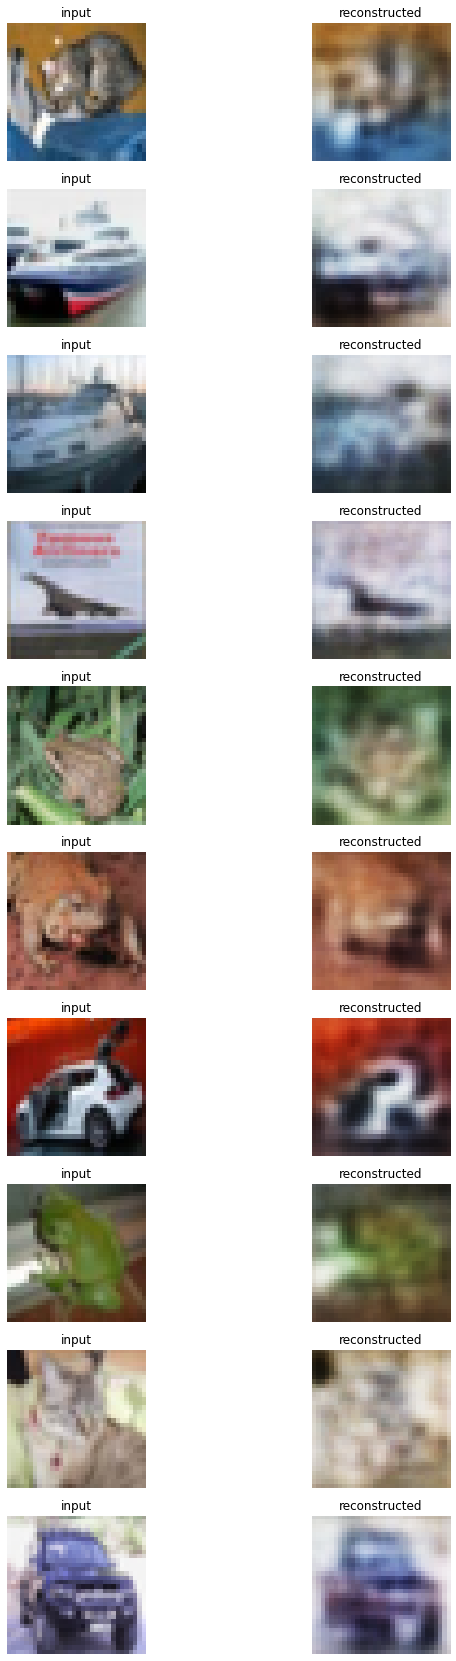

In [11]:
fig = plt.figure(figsize=(10, 30))
for i in range(10):
    ax1 = fig.add_subplot(10, 2, 2 * i + 1)
    ax2 = fig.add_subplot(10, 2, 2 * i + 2)
    ax1.axis('off')
    ax1.imshow(x_test[i])
    ax1.set_title('input')
    x = tf.expand_dims(x_test[i], 0)
    predicted = autoencoder.predict(x)
    ax2.axis('off')
    ax2.imshow(predicted[0])
    ax2.set_title('reconstructed')
plt.show()